In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv")

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
train_data["Built_age"]= 2010-train_data["YearBuilt"]
train_data["Remod_age"]=2010-train_data["YearRemodAdd"]
del train_data["Built_age"]
del train_data["Remod_age"]

<AxesSubplot:>

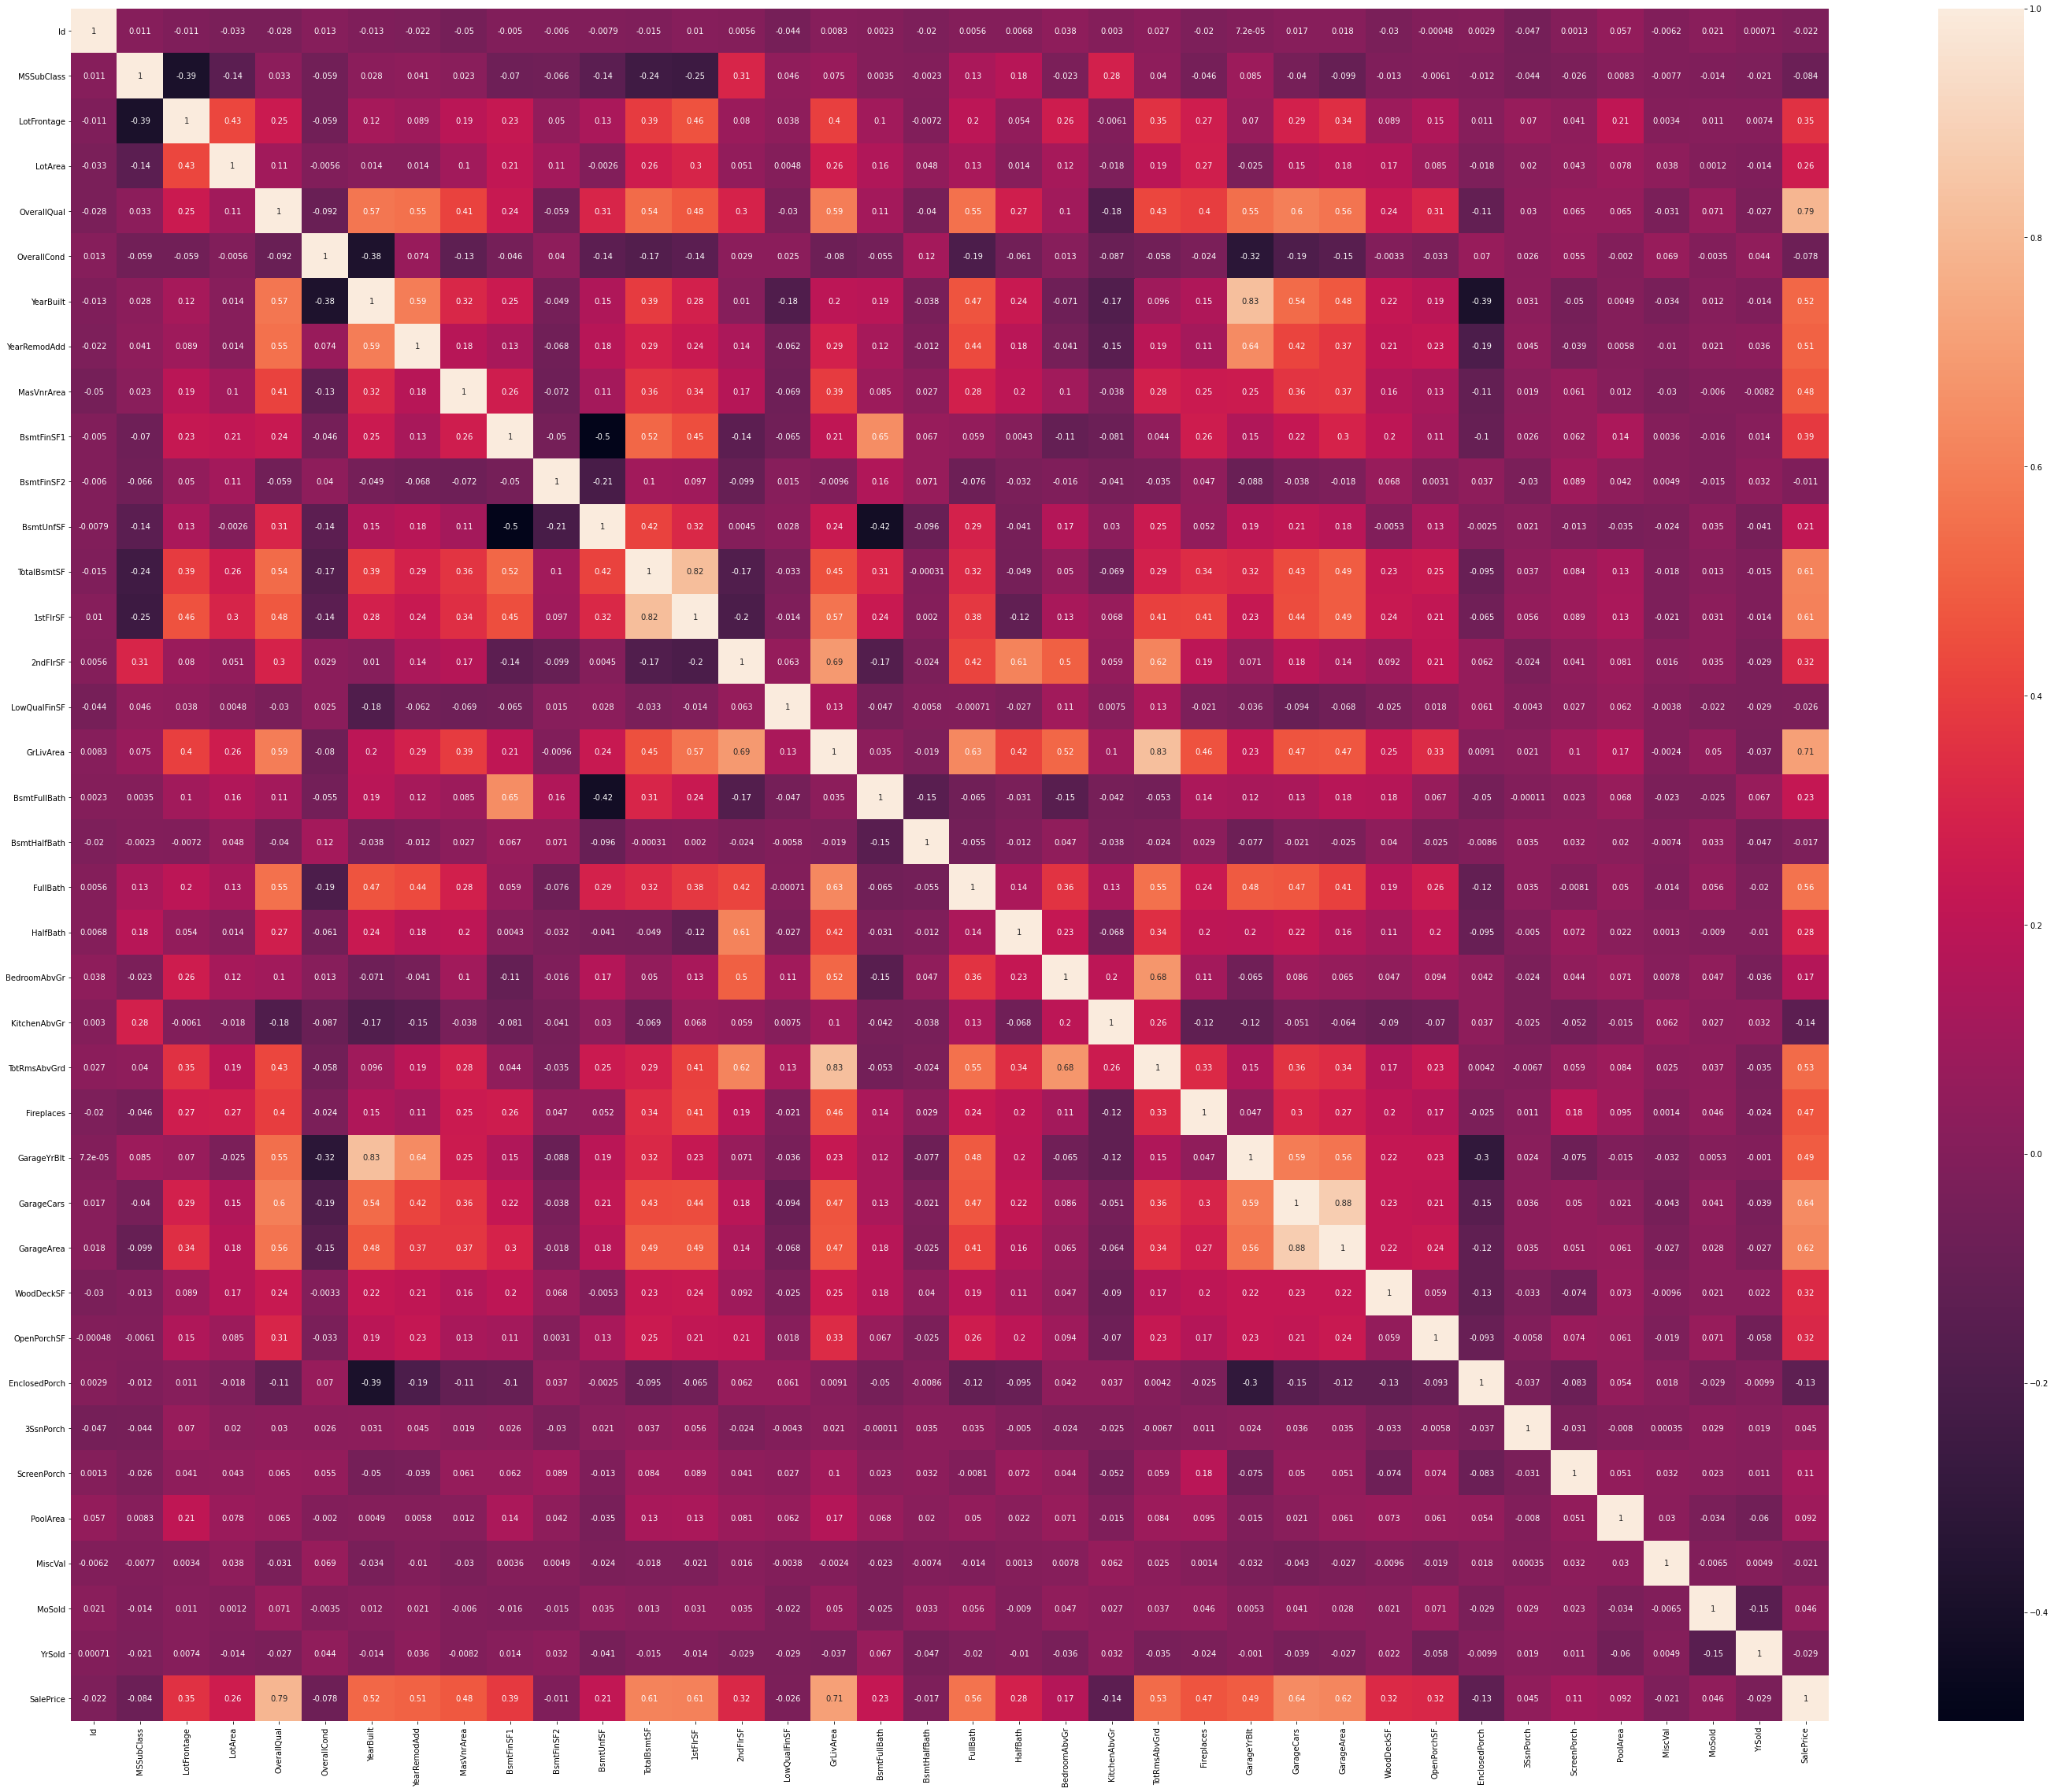

In [9]:
#train_data.corr()["SalePrice"]
plt.figure(figsize=(50,40))
sns.heatmap(train_data.corr(),annot=True)

In [10]:
train_data.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [11]:
#plt.figure(figsize=(20,10))
#sns.heatmap(train_data.corr(),annot=True)

corr=train_data.corr()["SalePrice"]
list(corr[corr>0.3].index.values)

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [12]:
train_data.duplicated().sum()

0

In [13]:
#sns.pairplot(train_data)

In [14]:
columns_select=list(corr[corr>0.3].index.values)

In [15]:
columns_select

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [16]:
train_df_select = train_data[['Id']+columns_select]
test_df_select = test_data[['Id','LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [17]:
train_df_select.head()

,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,1,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,2,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,3,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,4,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,5,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [18]:
test_df_select.head()

,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,1461,80.0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.0,1.0,730.0,140,0
1,1462,81.0,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.0,1.0,312.0,393,36
2,1463,74.0,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.0,2.0,482.0,212,34
3,1464,78.0,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.0,2.0,470.0,360,36
4,1465,43.0,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.0,2.0,506.0,0,82


In [19]:
train_df_select.isna().sum()

Id                0
LotFrontage     259
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64

In [20]:
test_df_select.isna().sum()

Id                0
LotFrontage     227
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
BsmtFinSF1        1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      78
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
dtype: int64

## Data Preprocessing

In [21]:
train_data['data']="train"
test_data['data']="test"
train_data.shape


(1460, 82)

In [22]:
test_data.shape

(1459, 81)

In [23]:
full_data=pd.concat([train_data,test_data])
full_data = full_data.reset_index().drop(columns="index")
full_data.shape

(2919, 82)

In [24]:
full_data["LotFrontage"].shape

(2919,)

In [25]:
from scipy.stats import mode
truth_table_MSSubClass_MSZoning = full_data.pivot_table(values="MSZoning", index = "MSSubClass", aggfunc=(lambda x: mode(x).mode[0]))

def find_MSZoning(x):
    return truth_table_MSSubClass_MSZoning.loc[x["MSSubClass"]]
#full_data.groupby("MSSubClass").MSZoning.mode()
#full_data.groupby("MSZoning").LotFrontage.transform(lambda x: x.fillna(x.median()))

In [26]:
truth_table_MSSubClass_MSZoning.loc[20]

MSZoning    RL
Name: 20, dtype: object

In [27]:
full_data[full_data["MSZoning"].isnull()].apply(find_MSZoning, axis= 1).squeeze()

1915    RM
2216    RL
2250    RM
2904    RL
Name: MSZoning, dtype: object

In [28]:
full_data["MSZoning"].fillna(full_data[full_data["MSZoning"].isnull()].apply(find_MSZoning, axis= 1).squeeze(), inplace = True)

In [29]:
full_data["MSZoning"].isna().sum()

0

In [30]:
full_data.pivot_table(values="MSSubClass", columns = "MSZoning")

MSZoning,C (all),FV,RH,RL,RM
MSSubClass,60.0,89.352518,89.807692,49.355977,83.636364


In [31]:

full_data["LotFrontage"] = full_data.groupby("MSZoning").LotFrontage.transform(lambda x: x.fillna(x.median()))

In [32]:
full_data.groupby("MSZoning").LotFrontage.median()

MSZoning
C (all)    60.0
FV         65.0
RH         60.0
RL         72.0
RM         52.0
Name: LotFrontage, dtype: float64

In [33]:
full_data["LotFrontage"].isna().sum()

0

In [34]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
full_data[['Id','LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].isna().sum()

Id                0
LotFrontage       0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       23
BsmtFinSF1        1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt     159
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
dtype: int64

In [35]:
pd.set_option('display.max_rows', 200)
full_data[full_data["GarageYrBlt"].isna() & full_data["GarageCars"]>=1][["GarageCars","GarageYrBlt","YearBuilt"]]
#full_data.GarageCars.unique()

#full_data.GarageYrBlt.unique()

,GarageCars,GarageYrBlt,YearBuilt
2126,1.0,NaN,1910


In [36]:
#full_data["GarageYrBlt"] = full_data[full_data["GarageYrBlt"].isna() & full_data["GarageCars"]>=1].GarageYrBlt.transform(lambda x: x.fillna(full_data.YearBuilt))
full_data.at[2126,'GarageYrBlt']='1910'

full_data["GarageYrBlt"] = full_data.GarageYrBlt.transform(lambda x: x.fillna(-1))

In [37]:
full_data.pivot_table(values="MasVnrArea", index = "MasVnrType") 



,MasVnrArea
MasVnrType,
BrkCmn,195.480000
BrkFace,261.672355
None,0.707233
Stone,239.550201


In [38]:
full_data[full_data["MasVnrArea"]=="None"][["MasVnrArea","MasVnrType","data"]]

,MasVnrArea,MasVnrType,data


In [39]:
full_data["MasVnrArea"].value_counts()

0.0       1738
120.0       15
200.0       13
176.0       13
216.0       12
          ... 
167.0        1
731.0        1
394.0        1
886.0        1
1159.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [40]:
full_data["MasVnrArea"] = full_data.MasVnrArea.transform(lambda x: x.fillna(0))

In [41]:
full_data["BsmtFinSF1"] = full_data.BsmtFinSF1.transform(lambda x: x.fillna(0))
full_data["TotalBsmtSF"] = full_data.TotalBsmtSF.transform(lambda x: x.fillna(0))   

    



In [42]:

full_data.GarageCars.value_counts()
    

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [43]:
full_data.GarageArea.value_counts() 

0.0       157
576.0      97
440.0      96
240.0      69
484.0      68
         ... 
1110.0      1
766.0       1
208.0       1
1043.0      1
428.0       1
Name: GarageArea, Length: 603, dtype: int64

In [44]:
full_data[full_data["GarageCars"].isna()][["GarageCars","GarageArea","GarageYrBlt"]]

,GarageCars,GarageArea,GarageYrBlt
2576,NaN,NaN,-1.0


In [45]:
full_data["GarageCars"] = full_data.GarageCars.transform(lambda x: x.fillna(0))
full_data["GarageArea"] = full_data.GarageArea.transform(lambda x: x.fillna(0))

In [46]:
full_data[['Id','LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].isna().sum()

Id              0
LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [47]:
preprocessed_data=full_data[['Id','LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','SalePrice','data']]

preprocessed_data.isna().sum()

Id                 0
LotFrontage        0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
BsmtFinSF1         0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
SalePrice       1459
data               0
dtype: int64

# StandardScalar

In [48]:
test_df_select.columns

Index(['Id', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [49]:
train_df_select.columns

Index(['Id', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [51]:
train_df=preprocessed_data[preprocessed_data["data"]=="train"]
test_df=preprocessed_data[preprocessed_data["data"]=="test"]

In [52]:

train_X = train_df.drop(columns=["Id", "SalePrice","data"])
train_y = np.log1p(train_df['SalePrice'])
test_X = test_df.drop(columns=["Id","SalePrice","data"])

In [53]:
def model_fit(model, train_X, train_y, test_X, id_col,filename):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    print(mean_squared_error(train_y, train_pred, squared=False))
    test_pred = model.predict(test_X)
    sample_submission['Id'] = id_col
    sample_submission['SalePrice'] = np.expm1(test_pred)
    sample_submission.to_csv(filename, index = False)
    return mean_squared_error(train_y, train_pred, squared=False), sample_submission

In [54]:
linear_model = LinearRegression()
linear_res = model_fit(linear_model, train_X, train_y, test_X, test_df_select['Id'], "linear_res_with_log.csv" )

0.1597150691198224


In [ ]:
#numeric_data_columns = preprocessed_data.select_dtypes(include = np.number).drop(columns=["Id", "SalePrice"]).columns

In [ ]:
#scaler = StandardScaler()
#preprocess_numeric_data_columns =pd.DataFrame(scaler.fit_transform(preprocessed_data[numeric_data_columns]), columns=numeric_data_columns)
#type(preprocess_numeric_data_columns)

In [ ]:
#final_preprocessed = pd.concat([ preprocess_numeric_data_columns, preprocessed_data[["Id", "SalePrice","data"]]], axis = 1)

In [ ]:
#train_df=final_preprocessed[final_preprocessed["data"]=="train"]
#test_df=final_preprocessed[final_preprocessed["data"]=="test"]

In [ ]:
#train_X = train_df.drop(columns=["Id", "SalePrice","data"])
#train_y = np.log1p(train_df['SalePrice'])
#test_X = test_df.drop(columns=["Id","SalePrice","data"])

In [ ]:
#linear_model = LinearRegression()
#linear_res = model_fit(linear_model, train_X, train_y, test_X, test_df_select['Id'], "linear_res_with_log_scalar.csv" )

In [64]:
model = Ridge(alpha = 0.5)
linear_res = model_fit(model, train_X, train_y, test_X, test_df['Id'].values, "linear_res_full_data_ridge.csv" )

0.15971508586089933


In [60]:
model = Lasso(alpha = 0.5)
linear_res = model_fit(model, train_X, train_y, test_X, test_df['Id'].values, "linear_res_full_data_lasso.csv" )

0.19256576656959862


In [59]:
model = ElasticNet()
linear_res = model_fit(model, train_X, train_y, test_X, test_df['Id'].values, "linear_res_full_data_elastic.csv" )

0.18704323208424486


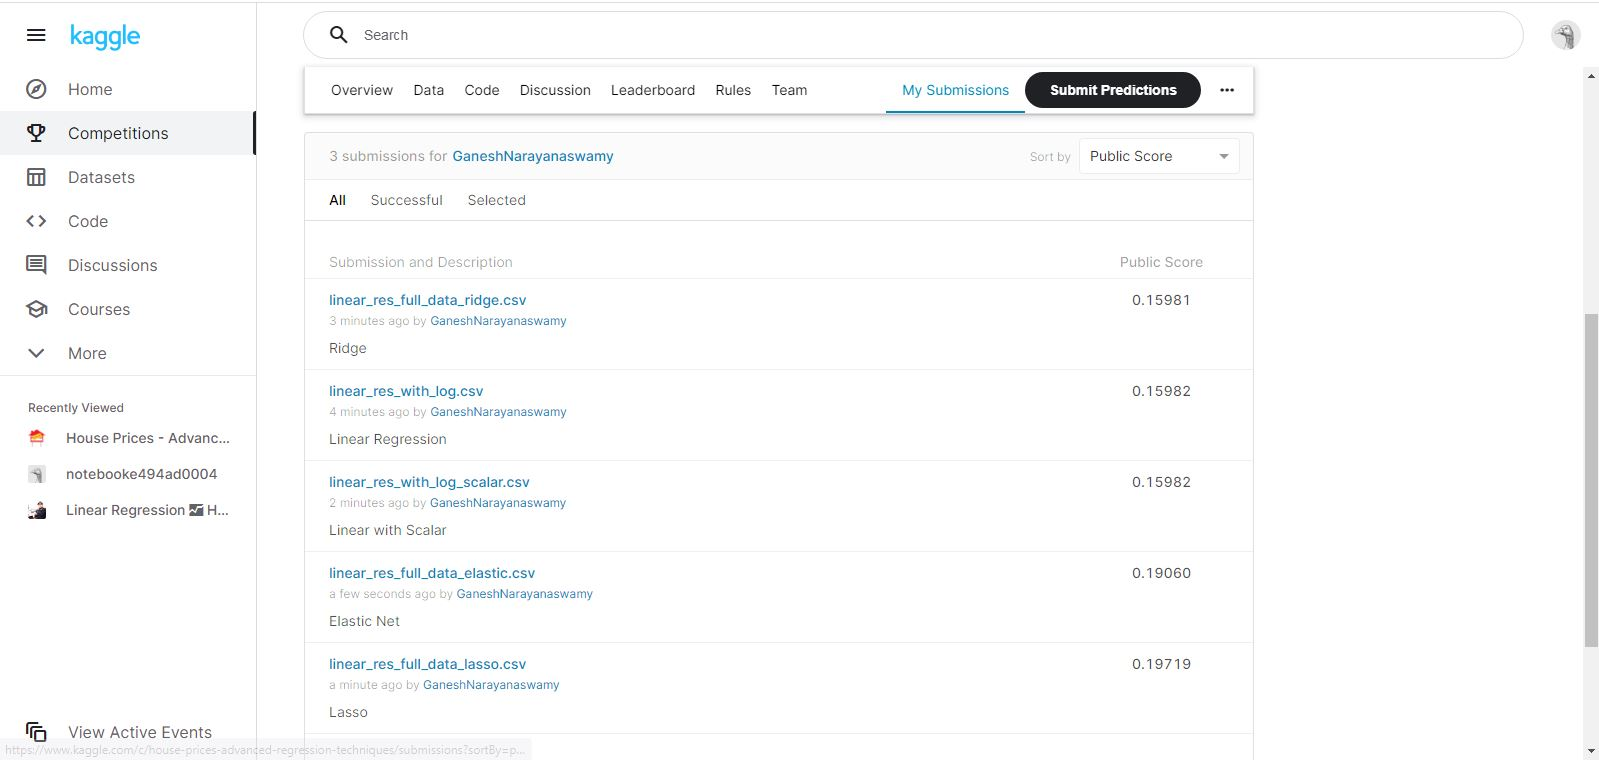

In [65]:
from IPython.display import Image
Image(filename='Kaggle_Score.JPG')